# Programming for Data Science
## NOVA IMS

#### Student Name:
Ana St.Aubyn
#### Student Number:
r2016713

### How to save your jupyter notebook
Save wih the following name HW3_\< id >.ipynb where \< id > is your student number. Upload your solution on moodle

### Homework 3

This week the homework assignment will test your ability to load and manipulate data with Pandas.

The goal is to develop some intuition on how to filter, arrange, and merge data.

## Assignment

### Part 1

In [1]:
import numpy as np
import scipy
import pandas as pd

## Download and Load the World Development Indicators data set

We will work with the World Development Indicators data set. <br/> 
We download this data set from the world bank databank.<br/>
Hence, the very first step is to download the data to your computer, you can do this by running the following cell. <br/>
Alternatively you can copy and paste the url inside the .get() method into your browser.

In [2]:
# importing libraries
import requests, zipfile, io

#note this can take several minutes depending on your internet connection
r = requests.get('http://databank.worldbank.org/data/download/WDI_csv.zip')
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

# let us free the variales we used above
del z
del r

The above code downloads a zip archive to the working folder, which by default is the the location of this notebook in your computer. <br/>
Secondly, and since the document downloaded is a zip archive, it extracts the documents from the archive. <br/> 
The contents include multiple .csv files, however we will be working only with the document 'WDIData.csv'. <br/>

In the cell bellow, use Pandas to open the file "WDIData.csv" and save it to a variable called 'wdi'.<br/>
Note you will might need to specify the option enconding, in my case the option "ISO-8859-1" worked fine.
Find more information at https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html

In [3]:
wdi = pd.read_csv(r'C:\Users\anacs\Documents\NOVA IMS\Mestrado\Programming For Data Science\Homework_3\WDIData.csv')
wdi.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,82.783289,83.120303,83.533457,83.897596,84.171599,84.510171,NaN,NaN,NaN,NaN
3,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,86.428272,87.070576,88.176836,87.342739,89.130121,89.678685,90.273687,NaN,NaN,NaN
4,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,73.942103,75.244104,77.162305,75.538976,78.741152,79.665635,80.749293,NaN,NaN,NaN


## Download and Load the Penn World Table V9.0

We will additionally use data from the pwt v9.0 tables. <br/> 
Again run the following cell to download the dataset. This time using the library urllib.

In [4]:
import urllib
urllib.request.urlretrieve("https://www.rug.nl/ggdc/docs/pwt90.xlsx", "pwt90.xlsx")

('pwt90.xlsx', <http.client.HTTPMessage at 0x1f2f34b83c8>)

In the following cell, open and read the file 'pwt90.xlsx' and save it into variable 'pwt'. <br/>
Remember that pandas has a method to read excel files, and secondly we need to specity the sheet we want to load data from.

In [5]:
pwt = pd.read_excel(r'C:\Users\anacs\Documents\NOVA IMS\Mestrado\Programming For Data Science\Homework_3\pwt90.xlsx', sheet_name='Data')
pwt.head()

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,...,csh_g,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_k
0,ABW,Aruba,Aruban Guilder,1950,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,Aruban Guilder,1951,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,Aruban Guilder,1952,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,Aruban Guilder,1953,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,Aruban Guilder,1954,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Wrangling

Now that we have loaded our data into variable 'wdi', we are ready to start playing with it. <br/>
Start by printing all column values in the cell bellow.

In [6]:
#i assumed column values are the column names
wdi.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', 'Unnamed: 64'],
      dtype='object')

Next, list the values in the column 'Country Name'.<br/>
You will get a list with repeated values, delete all duplicates to ease your analysis. <br/>

Tip: see the method '.drop_duplicates()' https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop_duplicates.html.

In [7]:
wdi['Country Name'].unique()

array(['Arab World', 'Caribbean small states',
       'Central Europe and the Baltics', 'Early-demographic dividend',
       'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)',
       'East Asia & Pacific (IDA & IBRD countries)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)',
       'Europe & Central Asia (IDA & IBRD countries)', 'European Union',
       'Fragile and conflict affected situations',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'IBRD only', 'IDA & IBRD total', 'IDA blend', 'IDA only',
       'IDA total', 'Late-demographic dividend',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Latin America & the Caribbean (IDA & IBRD countries)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa',
       'Middle East & No

You might notice that while the bottom rows represent Countries, the top rows represent aggregates of countries (e.g., world regions). <br/> However we will be only interested in working with country-level data, and as such we need to filter out all unecessary rows.

Save all the values of column 'Country Name' in variable 'cnames'. <br/>
Delete all duplicate values.<br>
Print the first 50 values in cnames (remember you can use slice here).

In [8]:
cnames=wdi['Country Name'].unique()

In [9]:
cnames[0:51]

array(['Arab World', 'Caribbean small states',
       'Central Europe and the Baltics', 'Early-demographic dividend',
       'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)',
       'East Asia & Pacific (IDA & IBRD countries)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)',
       'Europe & Central Asia (IDA & IBRD countries)', 'European Union',
       'Fragile and conflict affected situations',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'IBRD only', 'IDA & IBRD total', 'IDA blend', 'IDA only',
       'IDA total', 'Late-demographic dividend',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Latin America & the Caribbean (IDA & IBRD countries)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa',
       'Middle East & No

You can verify, that the first 48 values in cnames 'Country Name' do not correspond to countries, but aggregates.<br/>
In the next cell filter out, from 'wdi', rows in which 'Country Name' represents an aggregate of countries.<br/>

Tip1 : You can use the negation of .isin() to perform a boolean filter over the rows of the DataFrame, see an example at  https://erikrood.com/Python_References/rows_cols_python.html <br/>
Tip2 : You can also perform this action by slicing out all rows unecessary rows.

In [10]:
wdi = wdi.loc[~wdi['Country Name'].isin(cnames[0:47])]
wdi['Country Name'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Channel Islands', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt, Arab Rep.', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Faroe Is

Reset the indexes of 'wdi', you can use the method reset_index(), see https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.reset_index.html.
<br/> Perform this operation In Place.

In [11]:
wdi.reset_index(drop=True, inplace=True)

Show that the indexes have been reseted.

In [12]:
print(len(wdi.index))
wdi.index

310527


RangeIndex(start=0, stop=310527, step=1)

Note that when reseting the index, pandas appends a new column at the begining of the data frame, which holds the previous index values. <br/>

## Indicator Codes and Indicator Name

Select the columns 'Indicator Name' and 'Indicator Code'.<br/> 
Delete all duplicates, and then Print the top 5 and bottom 5 values. <br/>

*Tip: You should be able to do everything in a single line of code.*

In [13]:
wdi.drop_duplicates(subset=['Indicator Name', 'Indicator Code'])[['Indicator Name', 'Indicator Code']].iloc[np.r_[0:5, -5:0]]

,Indicator Name,Indicator Code
0,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05
1,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05
2,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS
3,Access to electricity (% of population),EG.ELC.ACCS.ZS
4,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS
1426,Women who believe a husband is justified in be...,SG.VAW.NEGL.ZS
1427,Women who believe a husband is justified in be...,SG.VAW.REFU.ZS
1428,Women who were first married by age 15 (% of w...,SP.M15.2024.FE.ZS
1429,Women who were first married by age 18 (% of w...,SP.M18.2024.FE.ZS
1430,Women's share of population ages 15+ living wi...,SH.DYN.AIDS.FE.ZS


Create a new DataFrame named 'indicators' made up of the columns 'Indicator Name' and 'Indicator Code'.<br/>
Delete all duplicated entries. <br/> 
Set the column 'Indicator Code' as the index of 'indicators'. <br/> 
The ouput should be a DataFrame around 1591 rows. <br/>
Try to perform all these steps in a single line of code.

In [14]:
indicators = wdi.drop_duplicates(subset=['Indicator Code'])[['Indicator Name', 'Indicator Code']].set_index('Indicator Code')
indicators.shape

(1431, 1)

The 'indicators' DataFrame can operate now as a dictionary. <br/> 
By passing an 'Indicator Code' (key) it returns the associated 'Indicator Name' (value).<br/>

Using 'indicators' DataFrame, find the 'Indicator Code' associated with the following observables:
1. 'Population', find the 'Indicator Code' of the total population in a country;
2. 'GDP', find the GDP measured in current US Dollars;
3. 'GINI index'

Tip1: You can use the method STRING.str.contains('substring') to check whether a string contains a substring, also note that the match is case sensitive.

In [15]:
indicators.loc[indicators['Indicator Name'].str.contains('Population')&indicators['Indicator Name'].str.contains('total')]
#the indicator code of the total population is SP.POP.TOTL

,Indicator Name
Indicator Code,
SP.POP.0014.TO.ZS,Population ages 0-14 (% of total population)
SP.POP.0014.TO,"Population ages 0-14, total"
SP.POP.1564.TO.ZS,Population ages 15-64 (% of total population)
SP.POP.1564.TO,"Population ages 15-64, total"
SP.POP.65UP.TO.ZS,Population ages 65 and above (% of total popul...
SP.POP.65UP.TO,"Population ages 65 and above, total"
EN.URB.MCTY.TL.ZS,Population in urban agglomerations of more tha...
EN.POP.EL5M.ZS,Population living in areas where elevation is ...
SP.POP.TOTL.FE.ZS,"Population, female (% of total population)"


In [16]:
indicators.loc[indicators['Indicator Name'].str.contains('GDP') & indicators['Indicator Name'].str.contains('current')]
#the indicator code is NY.GDP.MKTP.CD

,Indicator Name
Indicator Code,
NY.GDP.DISC.CN,Discrepancy in expenditure estimate of GDP (cu...
NY.GDP.MKTP.CN,GDP (current LCU)
NY.GDP.MKTP.CD,GDP (current US$)
NY.GDP.PCAP.CN,GDP per capita (current LCU)
NY.GDP.PCAP.CD,GDP per capita (current US$)
NY.GDP.PCAP.PP.CD,"GDP per capita, PPP (current international $)"
NY.GDP.MKTP.PP.CD,"GDP, PPP (current international $)"
NY.GDP.MKTP.CN.AD,GDP: linked series (current LCU)


In [17]:
indicators.loc[indicators['Indicator Name'].str.contains('GINI')]
#the indicator code is SI.POV.GINI

,Indicator Name
Indicator Code,
SI.POV.GINI,GINI index (World Bank estimate)


## Extracting and Cleaning data from WDI and PWT

From 'wdi' extract the columns 'Indicator Code', 'Country Code', and '2002'.
Save the output in variable 'wdi_sample'

Tip1: You should be able to perfom all operations in a single line of code. <br/>
Tip2: Use the method .loc\[\] to extract a row with a specified index value, see https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html.

In [18]:
wdi_sample = wdi[['Indicator Code', 'Country Code', '2002']]
wdi_sample.head()

,Indicator Code,Country Code,2002
0,PA.NUS.PPP.05,AFG,NaN
1,PA.NUS.PRVT.PP.05,AFG,NaN
2,EG.CFT.ACCS.ZS,AFG,10.39
3,EG.ELC.ACCS.ZS,AFG,NaN
4,EG.ELC.ACCS.RU.ZS,AFG,NaN


Select from 'wdi_sample' the lines associated with all the Indicator Codes that you found above, which concern the data of the 'GINI index', 'GDP', and 'Population total'.

In [19]:
wdi_sample.loc[wdi_sample['Indicator Code'].isin(['SI.POV.GINI', 'NY.GDP.MKTP.CD', 'SP.POP.TOTL'])].head()

,Indicator Code,Country Code,2002
471,NY.GDP.MKTP.CD,AFG,4.055177e+09
495,SI.POV.GINI,AFG,NaN
1057,SP.POP.TOTL,AFG,2.260077e+07
1902,NY.GDP.MKTP.CD,ALB,4.348070e+09
1926,SI.POV.GINI,ALB,3.170000e+01


In [20]:
wdi_sample = wdi_sample.loc[wdi_sample['Indicator Code'].isin(['SI.POV.GINI', 'NY.GDP.MKTP.CD', 'SP.POP.TOTL'])]

Create a pivot table, in which values are the column '2002', the index is the 'Country Code', and the columns are the Indicator Codes. <br/>

You can use the function pivot_table() from Pandas, see http://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html.

In [21]:
wdi_sample = pd.pivot_table(wdi_sample, values='2002', index='Country Code', columns='Indicator Code')
wdi_sample

Indicator Code,NY.GDP.MKTP.CD,SI.POV.GINI,SP.POP.TOTL
Country Code,,,
ABW,1.941341e+09,NaN,94992.0
AFG,4.055177e+09,NaN,22600770.0
AGO,1.528559e+10,NaN,17519417.0
ALB,4.348070e+09,31.7,3051010.0
AND,1.733117e+09,NaN,70049.0
ARE,1.098162e+11,NaN,3478777.0
ARG,9.772400e+10,53.8,37681749.0
ARM,2.376335e+09,34.8,3033978.0
ASM,5.140000e+08,NaN,59080.0


Rename the column names of wdi_sample to 'Population', 'GDP', and 'GINI', accordingly.

In [22]:
wdi_sample = wdi_sample.rename(columns={'NY.GDP.MKTP.CD': 'GDP', 'SI.POV.GINI': 'GINI', 'SP.POP.TOTL':'Population'})

From 'pwt' select only the values of the year 2002. <br/>
Then, extract the columns 'countrycode' and 'hc' into a new variable 'pwt_sample'. <br/>
Rename 'countrycode' to 'Country Code', so that it matches the same column in 'wdi_sample'<br/>
Note that here 'hc' stands for the Human Capital Index.<br/>

In [23]:
pwt_sample = pwt.loc[pwt['year']==2002]
pwt_sample = pwt_sample[['countrycode', 'hc']]
pwt_sample.rename(columns={'countrycode':'Country Code', 'hc':'Human Capital'}, inplace=True)
pwt_sample.head()

,Country Code,Human Capital
52,ABW,NaN
117,AGO,1.320135
182,AIA,NaN
247,ALB,2.829102
312,ARE,2.646711


Finally, create a new dataframe named 'data' that contains the columns from wdi_sample and pwt_sample, matched by 'Country Code'. Use the method concat(), and make sure both dataframes have the same index ('Country Code').

In [24]:
pwt_sample.set_index('Country Code', inplace=True)
data=pd.concat([wdi_sample, pwt_sample], axis=1, sort=False)
data.head()

,GDP,GINI,Population,Human Capital
ABW,1.941341e+09,NaN,94992.0,NaN
AFG,4.055177e+09,NaN,22600770.0,NaN
AGO,1.528559e+10,NaN,17519417.0,1.320135
ALB,4.348070e+09,31.7,3051010.0,2.829102
AND,1.733117e+09,NaN,70049.0,NaN


Consider the data for the year 2002 that you have prepared above. Perform the necessary data manipulations to answer the following questions:

1. Which countries have a population size of 10 million habitations +/- 1 million?
2. What is the average and the standard deviation in GDP of countries listed in 1?
3. What is the average and the standard deviation in the GDP of countries NOT listed in 1?
4. Repeat point 2 and 3 but for the GDP per capita.
5. What is the Country with the highest Human Capital (hc in the PWT tables)?
6. What is the Country with the Lowest Human Capital (hc in the PWT tables)?

Write the necessary code to obtain the answer to each question in a single cell. <br/>
Print the answer at the end of that cell.

In [25]:
data1=data.loc[(data['Population'] >= 9000000) & (data['Population'] <= 11000000)]
#the countries with population size of around 10 million population are:
    #BEL, BLR, CZE, GRC, HUN, PRT, SEN, SOM, TCD, TUN, ZMB
data1

,GDP,GINI,Population,Human Capital
BEL,2.588604e+11,NaN,10332785.0,3.011329
BLR,1.459425e+10,30.3,9865548.0,NaN
CZE,8.191077e+10,NaN,10196916.0,3.590435
GRC,1.538309e+11,NaN,10902022.0,2.770473
HUN,6.771689e+10,NaN,10158608.0,3.022151
PRT,1.342287e+11,NaN,10419631.0,2.238787
SEN,6.752510e+09,NaN,10283699.0,1.339512
SOM,NaN,NaN,9501342.0,NaN
TCD,1.987622e+09,NaN,9019233.0,NaN
TUN,2.314229e+10,NaN,9871251.0,1.937275


In [26]:
print('The average of the GDP of the countries listed above is: ', data.loc[(data['Population'] >= 9000000) & (data['Population'] <= 11000000)].GDP.mean())

print('The standard deviation of the GDP of the countries listed above is:', data.loc[(data['Population'] >= 9000000) & (data['Population'] <= 11000000)].GDP.std(axis=0))

The average of the GDP of the countries listed above is:  74721826211.25868
The standard deviation of the GDP of the countries listed above is: 84962188129.0983


In [27]:
data2=data[~data.index.isin(data1.index)]

print('The average of the GDP of the countries not listed above is: ', data2.GDP.mean())

print('The standard deviation of the GDP of the countries not listed above is:', data2.GDP.std(axis=0))

The average of the GDP of the countries not listed above is:  172942213728.81775
The standard deviation of the GDP of the countries not listed above is: 875601001561.8105


In [28]:
#GDP per capita = GDP/Population
pd.options.mode.chained_assignment = None
data1['GDP_capita']=data1.GDP/data1.Population
data2['GDP_capita']=data2.GDP/data2.Population

print('The average of the GDP per capita of the countries listed in 1: ', data1.GDP_capita.mean())
print('The standard deviation of the GDP per capita of the countries listed in 1:', data1.GDP_capita.std(axis=0))
print()
print('The average of the GDP per capita of the countries not listed in 1: ', data2.GDP_capita.mean())
print('The standard deviation of the GDP per capita of the countries not listed in 1:', data2.GDP_capita.std(axis=0))

The average of the GDP per capita of the countries listed in 1:  7182.676858164884
The standard deviation of the GDP per capita of the countries listed in 1: 8124.301647647269

The average of the GDP per capita of the countries not listed in 1:  8898.923499570043
The standard deviation of the GDP per capita of the countries not listed in 1: 14142.63888456442


In [29]:
data.loc[data['Human Capital'].idxmax()]
#maximum hc = USA

GDP              1.093642e+13
GINI                      NaN
Population       2.876252e+08
Human Capital    3.598119e+00
Name: USA, dtype: float64

In [30]:
data.loc[data['Human Capital'].idxmin()]
#minimum hc = BFA

GDP              3.205592e+09
GINI                      NaN
Population       1.229310e+07
Human Capital    1.088122e+00
Name: BFA, dtype: float64

In [31]:
del data1, data2








# Part 2

After a quick and brief introduction to Numpy and Pandas, this second part will explore your ability to build simple linear regression models using the statsmodel package in Python.

Linear regression is a statistical model that examines the linear relationship between two (Simple Linear Regression ) or more (Multiple Linear Regression) variables — a dependent variable and independent variable(s). Linear relationship basically means that when one (or more) independent variables increases (or decreases), the dependent variable increases (or decreases) too
a linear relationship can be positive: independent variable (X-axis) goes up, dependent variable (Y-axis) goes up.
or negative: independent variable (X-axis) goes up, dependent variable (Y-axis) goes down. 

A linear model assumes that the relationship between variables Y and X is represented by this equation:

\begin{equation}
    Y_i = mX + b
\end{equation}

In the above expression, Y is the dependent variable — or the variable we are trying to predict or estimate;
X is the independent variable — the variable we are using to make predictions; 
m is the slope of the regression line — it represent the effect X has on Y. 
In other words, if X increases by 1 unit, Y will increase by exactly m units.
This is not necessarily applicable in real life — we won’t always know the exact relationship between X and Y or have an exact linear relationship.

In most cases, we will have more than one independent variable — we’ll have multiple variables; it can be as little as two independent variables and up to hundreds (or theoretically even thousands) of variables. In those cases we will use a Multiple Linear Regression model (MLR). The regression equation is pretty much the same as the simple regression equation, just with more variables:

\begin{equation}
    Y_i = \beta_1X_1 + \beta_0X_0 + \alpha + \epsilon
\end{equation}

where $\beta_0$ and $\beta_1$ are the coefficients associated with the independent variables $X_0$ and $X_1$, $\alpha$ is the intercept, and $\epsilon$ is an error term (that is what we cannot explain). What we will be trying to do is to train a regression model to find the coefficients and the intercept that minimize the error term and maximizes our prediction of $Y$.

Naths aside, you will focus in the implementation of regression models in Python using statsmodels. We will be using a dataset of the Boston house prices (http://scikit-learn.org/stable/datasets/index.html#boston-dataset). Because it is a dataset designated for testing and learning machine learning tools, it comes with a description of the dataset, and we can see it by using the command print data.DESCR (this is only true for sklearn datasets, not every dataset!).

## Setting up the working environment

Let us prepare our workbench, by loading all necessary libraries

In [32]:
import statsmodels.api as sm # this loads statsmodels

In [33]:
from sklearn import datasets ## imports datasets from scikit-learn
data = datasets.load_boston() ## loads Boston dataset from datasets library 

In [34]:
data.DESCR #scikit-learn datasets come with a handy description attached, which looks ugly when printed directly

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

A prettier summary of output looks like the following:

    :Number of Instances: 506 
    :Number of Attributes: 13 numeric/categorical predictive
    :Median Value (attribute 14) is usually the target
    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per 10,000USD
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in 1000USD's


We will next save all the data in a nice pandas dataframe (df), note that we will be trying to predict the MedianValue of owner-occupied homes (MEDV), hence we save it in a different dataframe.

In [35]:
# define the data/predictors as the pre-set feature names  
df = pd.DataFrame(data.data, columns=data.feature_names)

# Put the target (housing value -- MEDV) in another DataFrame
target = pd.DataFrame(data.target, columns=["MEDV"])

In [36]:
df.describe() # we can use descripe to get a nice overview of the descriptive statistics of each column in a dataframe

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


## Hands to work



1. Using Pandas and Statsmodels/Scipy construct a square matrix that indicates the pearson correlation coefficient between all variables in the dataset, including the dependent variable (target). 

You can get find more information about the pearson correlation at https://en.wikipedia.org/wiki/Pearson_correlation_coefficient. And a discussion thread that discusses how to implement and visualize a correlation matrix at https://datascience.stackexchange.com/questions/10459/calculation-and-visualization-of-correlation-matrix-with-pandas

Additional challenge: try to present a plot that visually shows the correalations between every pair of variables.

In [37]:
target_corr=df.corrwith(target.MEDV)
correlations=df.corr(method ='pearson')
corr=pd.concat([target_corr, correlations], axis=1, sort=False)
del target_corr, correlations
corr.rename(columns={0: 'MEDV'}, inplace=True)
corr

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,-0.388305,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,0.360445,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,-0.483725,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,0.175260,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,-0.427321,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,0.695360,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,-0.376955,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,0.249929,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,-0.381626,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,-0.468536,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


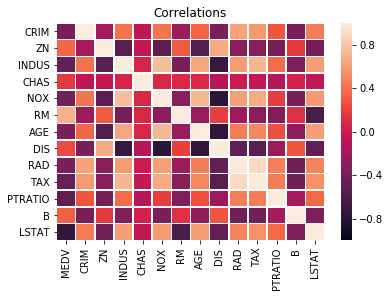

In [38]:
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
sb.heatmap(corr, vmin=-1, vmax=1, linewidths=.5)
plt.title('Correlations')
plt.show()

In [39]:
#the previous wasnt really a square matrix even though it had all the info
#CREATING SQUARE MATRIX
#create dataframe with all the variables
df_all=pd.concat([target, df], axis=1)
df_all.head()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [40]:
correlations=df_all.corr(method ='pearson')
correlations

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
MEDV,1.000000,-0.388305,0.360445,-0.483725,0.175260,-0.427321,0.695360,-0.376955,0.249929,-0.381626,-0.468536,-0.507787,0.333461,-0.737663
CRIM,-0.388305,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,0.360445,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,-0.483725,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,0.175260,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,-0.427321,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,0.695360,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,-0.376955,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,0.249929,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,-0.381626,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676


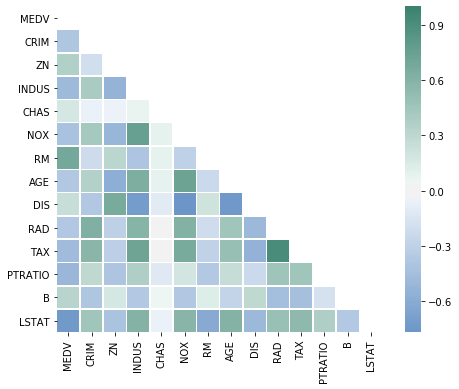

In [41]:
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

# Generate a mask for the triangle
    #getting array of zeros and setting all of them to False
mask = np.zeros_like(correlations, dtype=np.bool)
    #return the indices for the upper-triangle and setting them to True
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure (choosing size of plot for it not to be too small)
f, ax = plt.subplots(figsize=(8, 6))

# Generate a custom diverging colormap (pastel colors) and turning it into a colormap
    #using munsell color system
cmap = sb.diverging_palette(249, 163, as_cmap=True)

# Draw the heatmap with the mask (only the False values of the mask will appear)
    #using linewidths so that the cells dont show up all together but separated by a line instead
sb.heatmap(correlations, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5)

2. Use the statsmodel to regress the Median value of owner-occupied homes against the average number of rooms per dwelling, don't forget to include the intercept. Print a summary of the statistics. 

(remember you can use patsy to easily prepare the design matrix, see https://patsy.readthedocs.io/en/latest/API-reference.html)

In [42]:
from statsmodels.iolib.summary2 import summary_col
from patsy import dmatrices
y, b = dmatrices('MEDV ~ RM', df_all, return_type = 'dataframe')

#adding intercept
x=sm.add_constant(b)

model = sm.OLS(y, x).fit()
print(model.summary())

#we can conclude that both the intercept and the average number of rooms per dwelling have a p-value of 0, so they are
#good regressors to include in our model
#The R square is 0.484 meaning that this model explains around 50% of the total variance

C:\Users\anacs\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Wed, 13 Nov 2019   Prob (F-statistic):           2.49e-74
Time:                        12:17:02   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

3. Explore extending your simple linear model to a multi linear model with additional variables. Explain your choice of variables. For each model print a summary of the statistics. Print a table that summarizes the different models you explored. (Note that CHAS is a dummy variable)

Tip: you might find the following discussion thread relevant to learn how to print a summary comparsion of multiple regression models https://economics.stackexchange.com/questions/11774/outputting-regressions-as-table-in-python-similar-to-outreg-in-stata

In [43]:
#I am going to choose the variables to include based on the correlation matrix
#I should include variables that are the most correlated with the dependent variablebut not correlated among themselves
#Firstly, I am going to try to include LSTAT since it has the higher correlation with MEDV (-0.737663)

y, b = dmatrices('MEDV ~ RM + LSTAT', df_all, return_type = 'dataframe')

#adding intercept
x=sm.add_constant(b)

model2 = sm.OLS(y, x).fit()
print(model2.summary())

#By adding this variable the rsquare improves largely. However, the intercept is not statiscally relevant anymore

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     444.3
Date:                Wed, 13 Nov 2019   Prob (F-statistic):          7.01e-112
Time:                        12:17:02   Log-Likelihood:                -1582.8
No. Observations:                 506   AIC:                             3172.
Df Residuals:                     503   BIC:                             3184.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3583      3.173     -0.428      0.6

In [44]:
#I am going to do the exact same model without the intercept

y, c = dmatrices('MEDV ~ RM + LSTAT', df_all, return_type = 'dataframe')

model3 = sm.OLS(y, c-1).fit()
print(model3.summary())

#The rsquare is almost perfect and both variables have a p-value of 0! However there is some collinearity in our model :(

                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.948
Model:                            OLS   Adj. R-squared (uncentered):              0.948
Method:                 Least Squares   F-statistic:                              4626.
Date:                Wed, 13 Nov 2019   Prob (F-statistic):                        0.00
Time:                        12:17:02   Log-Likelihood:                         -1583.4
No. Observations:                 506   AIC:                                      3171.
Df Residuals:                     504   BIC:                                      3179.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\anacs\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1755: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
C:\Users\anacs\Anaconda3\lib\site-packages\statsmodels\base\model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\anacs\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\anacs\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\anacs\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [45]:
#COMPARING MODELS

models = summary_col([model,model2,model3],stars=True)
print(models)


             MEDV I    MEDV II    MEDV III 
-------------------------------------------
Intercept -34.6706*** -1.3583    0.0000    
          (2.6498)    (3.1728)   (0.0000)  
LSTAT                 -0.6424*** -0.6062***
                      (0.0437)   (0.0303)  
RM        9.1021***   5.0948***  5.5957*** 
          (0.4190)    (0.4445)   (0.0776)  
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


4. Open Question - consider you would like to extend this model with additional data. Which variables and data sources would you consider to improve your model? You might consider that instead of Boston you would be doing a similar analysis for another market, e.g. Lisbon or São Paulo.

In [46]:
#The average income can define the selling price of houses
    #(city statistics sites or government sites like por data in Portugal
#The number of tourists in a city also inflates the prices. However, I would divide this variable for the population of the city 
    #(city statistics sites or government sites like por data in Portugal)
#another good measure for tourism would be the average night price for an airbnb in the city 
    #(we can get this information at the airbnb data site)
#the distance from the sea can also be related to the prices
    #(we can get this info from geospacial databases)

# Part 3

Look to the zip folder and their files

1. Load each data file into a different pandas DataFrame

In [47]:
#create directory for getting the documents
import os
os.chdir(r'C:\Users\anacs\Documents\NOVA IMS\Mestrado\Programming For Data Science\Homework_3')

In [48]:
# load cpv
cpv =pd.read_excel('cpv_codes.xlsx')
cpv.head()

,CODE,EN,PT
0,03000000-1,"Agricultural, farming, fishing, forestry and r...","Produtos da agricultura, da pesca, da silvicul..."
1,03100000-2,Agricultural and horticultural products,Produtos agrícolas e hortofrutícolas
2,03110000-5,"Crops, products of market gardening and hortic...","Cereais, produtos de culturas industriais e da..."
3,03111000-2,Seeds,Sementes
4,03111100-3,Soya beans,Soja


In [49]:
#load pop (the original dataset does not have header)
pop =pd.read_csv('popsize.csv', header=None, encoding='UTF-8', sep=';')

#it created an unnecessary column, plus the columns do not have names
pop.columns=['Municipio', 'Populacao', 'Nada']
del pop['Nada']
pop.head()

,Municipio,Populacao
0,Arcos de Valdevez,22 284
1,Caminha,16 465
2,Melgaço,8 874
3,Monção,18 931
4,Paredes de Coura,9 039


In [50]:
pop.dtypes
#column Populacao must be numeric
#could not convert directly probably because it has some characters that are not numbers!!

Municipio    object
Populacao    object
dtype: object

In [51]:
#only keeping the digits of the strings in the Populacao column
pop.Populacao = pop['Populacao'].map(lambda x: ''.join([i for i in x if i.isdigit()]))
pop['Populacao'] = pop['Populacao'].astype('int')
pop.dtypes

Municipio    object
Populacao     int32
dtype: object

In [52]:
mun =pd.read_csv('municipalities.csv')
mun.head()

,id,contracting,NIF,Name
0,51,Município de Lisboa (500051070),500051070,Município de Lisboa
1,64,Município de Mértola (503279765),503279765,Município de Mértola
2,73,Município do Barreiro (506673626),506673626,Município do Barreiro
3,136,Município do Entroncamento (501120149),501120149,Município do Entroncamento
4,160,Município de Santarém (505941350),505941350,Município de Santarém


In [53]:
proc =pd.read_csv('proc_2013.csv', sep=';')
del proc['Unnamed: 0']
proc.iloc[0:2]

,ID,dateBase,type,description,contracting,contractor,CPV,initialDate,initialValue,proposedDuration,local,closingDate,finalValue
0,3046974,21-02-2017,Aquisição de serviços,PT EMPRESAS / MEO,"EPRALIMA - Escola Profissional do Alto Lima, C...",MEO (504615947),"64000000-6, Serviços postais e de telecomunica...",01-12-2013,"247,00 €",744 dias,"Portugal, Viana do Castelo, Arcos de Valdevez",-,-
1,2332852,09-08-2016,Aquisição de serviços,CP 07/2013 - Aquisição de serviços de saúde no...,"Rádio e Televisão de Portugal, S. A. (500225680)","Atlanticare, Serviços Saúde S.A. (507528212)","85147000-1, Serviços de medicina do trabalho",01-12-2013,"69.744,24 €",365 dias,Portugal,-,-


2. What is the NIF of the municipality with lowest population

NIF (Numero de Identificacao Fiscal) = Tax Identification number

In [54]:
#getting municipality with lowest population
pop.loc[pop['Populacao'] == pop['Populacao'].min()]['Municipio']

296    Corvo
Name: Municipio, dtype: object

In [55]:
#getting NIF of Corvo
mun.loc[mun['Name'].str.contains('Município do Corvo')]['NIF']

196    512065837
Name: NIF, dtype: int64

3. Aggregate expenses (Final Values) for all municipalities by month and plot it

What are the highest Final Values grouped by CPV Codes (Common Procurement Vocabulary) aggregated by the all municipalities

Consider the first division (first 2 digits)

In [56]:
#Final values are on the proc dataframe - this dataframe has a lot of expenses that are not related to municipalities
    #I created a new dataframe that only includes expenses of municipalities
    #By sorting the excel and checking the values I found that município was written in 5 different ways

proc_mun=proc.loc[proc['contracting'].str.startswith('Municipio') | proc['contracting'].str.startswith('Município')
                 |proc['contracting'].str.startswith('MUNICÍPIO') | proc['contracting'].str.startswith('MUNICIPIO')
                 | proc['contracting'].str.startswith('Munícipio')]
proc_mun.reset_index(drop=True, inplace=True)
proc_mun.iloc[0:2]

,ID,dateBase,type,description,contracting,contractor,CPV,initialDate,initialValue,proposedDuration,local,closingDate,finalValue
0,1643358,06-10-2015,Locação de bens móveis,CPI/5/2013/DMC,Município do Porto (501306099),"Suma, Serviços Urbanos e Meio Ambiente, S.A. (...","34144511-3, Veículos para recolha de lixo",02-12-2013,"576.000,00 €",1800 dias,"Portugal, Porto, Porto",-,-
1,1165127,26-08-2014,Aquisição de serviços,Aquisição de serviços de aluguer de camião par...,Município de Nisa (506612287),Valnor-Valorização e Tratamento de Resíduos Só...,"90000000-7, Serviços relativos a águas residua...",02-12-2013,"12.000,00 €",240 dias,"Portugal, Portalegre, Nisa",31-12-2013,"840,00 €"


In [57]:
proc_mun.dtypes
#we will need the final value as a numeric and the closing date as a datetime

ID                   int64
dateBase            object
type                object
description         object
contracting         object
contractor          object
CPV                 object
initialDate         object
initialValue        object
proposedDuration    object
local               object
closingDate         object
finalValue          object
dtype: object

In [58]:
#removing unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

#in order to be able to change to float we need to take away all non numeric characters, leaving the dot separating decimals
proc_mun['finalValue']=proc_mun['finalValue'].str.replace('€', '')
proc_mun['finalValue']=proc_mun['finalValue'].str.replace('.', '')
proc_mun['finalValue']=proc_mun['finalValue'].str.replace(',', '.')
proc_mun['finalValue']=proc_mun['finalValue'].str.replace(' ', '')

#replace - with nan
proc_mun.replace('-', np.nan, inplace=True)

#convert finalValues into floats
proc_mun['finalValue']=proc_mun['finalValue'].astype('float')

In [59]:
#convert closingDate to DateTime
proc_mun['closingDate'] = pd.to_datetime(proc_mun['closingDate'], format='%d-%m-%Y')
proc_mun.dtypes

ID                           int64
dateBase                    object
type                        object
description                 object
contracting                 object
contractor                  object
CPV                         object
initialDate                 object
initialValue                object
proposedDuration            object
local                       object
closingDate         datetime64[ns]
finalValue                 float64
dtype: object

In [60]:
#group finalValue by month
month_exp=proc_mun.groupby(proc_mun['closingDate'].dt.strftime('%B'))['finalValue'].sum()
month_exp=pd.DataFrame(month_exp)
month_exp['Month']=month_exp.index
month_exp.reset_index(drop=True, inplace=True)
month_exp

,finalValue,Month
0,2.324968e+07,April
1,3.524474e+07,August
2,1.165979e+08,December
3,3.103389e+07,February
4,3.700081e+08,January
5,5.666384e+07,July
6,4.199959e+07,June
7,3.078757e+07,March
8,3.236957e+07,May
9,2.392648e+08,NaT


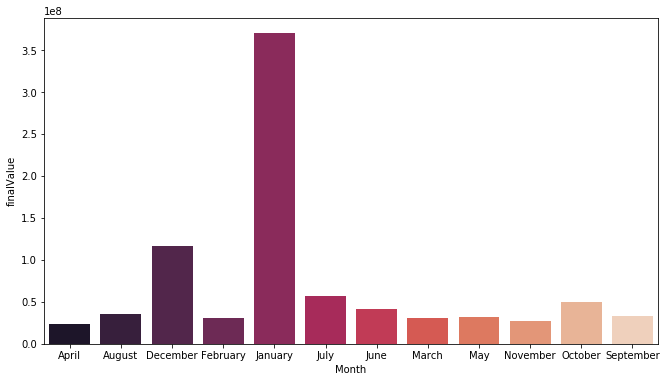

In [61]:
#remove row with no month :(
month_exp=month_exp.loc[month_exp['Month']!='NaT']

#plot it!
f, ax = plt.subplots(figsize=(11, 6))
sb.barplot(x=month_exp['Month'], y=month_exp['finalValue'], palette='rocket')

#cleaning up - delete month_exp dataframe
del month_exp

#SINCE ON THE NEXT QUESTION IT IS ASKED FOR US TO GROUP EXPENSES BY CPV I AM GOING TO ANSWER TO
#What are the highest Final Values grouped by CPV Codes (Common Procurement Vocabulary) aggregated by the all municipalities
#ON THE NEXT QUESTION

4. Aggregate expenses for all municipalities by CPV Codes

Consider the first division (first 2 digits)

In [62]:
#I am going to use the proc_mun dataframe I created before
    #Firstly, I need to only keep the first part of the CPV (ignore what is after the comma)
proc_mun['CPV']=proc_mun.CPV.str.split(',').str[0]

#Now I only need the first two numbers of the CPV
proc_mun['CPV']=proc_mun['CPV'].str[0:2]

#Convert into integer
#proc_mun['CPV']=proc_mun['CPV'].astype('int')

proc_mun.head()

,ID,dateBase,type,description,contracting,contractor,CPV,initialDate,initialValue,proposedDuration,local,closingDate,finalValue
0,1643358,06-10-2015,Locação de bens móveis,CPI/5/2013/DMC,Município do Porto (501306099),"Suma, Serviços Urbanos e Meio Ambiente, S.A. (...",34,02-12-2013,"576.000,00 €",1800 dias,"Portugal, Porto, Porto",NaT,NaN
1,1165127,26-08-2014,Aquisição de serviços,Aquisição de serviços de aluguer de camião par...,Município de Nisa (506612287),Valnor-Valorização e Tratamento de Resíduos Só...,90,02-12-2013,"12.000,00 €",240 dias,"Portugal, Portalegre, Nisa",2013-12-31,840.00
2,1045565,24-04-2014,Empreitadas de obras públicas,Valorizar as Pessoas: Educação – Parque Escola...,Município de Matosinhos (501305912),"CPCMS – Construção, Manutenção e Serviços, S.A...",45,02-12-2013,"12.280,00 €",30 dias,"Portugal, Porto, Matosinhos",NaT,12213.44
3,948903,14-01-2014,Aquisição de serviços,Projeto Formação-Ação - Qualificação dos Profi...,Município de Constância (506826546),Fundação Cefa - Fundação para os Estudos e For...,80,02-12-2013,"34.392,75 €",365 dias,"Portugal, Santarém, Constancia",2014-12-31,34392.75
4,928676,27-12-2013,Aquisição de serviços,Ajuste Direto do Espectaculo Piromusical 2013-...,Município de Beja (504884620),Henrique Costa & Filhos Lda (504106880),92,02-12-2013,"6.000,00 €",1 dias,"Portugal, Beja, Beja",2014-01-03,6000.00


In [63]:
#Aggregating expenses by CPV and putting it on a dataframe
cpv_exp=proc_mun.groupby(proc_mun['CPV'])['finalValue'].sum()
cpv_exp=pd.DataFrame(cpv_exp)
cpv_exp['CPV']=cpv_exp.index
cpv_exp.reset_index(drop=True, inplace=True)
cpv_exp.head()

,finalValue,CPV
0,1282331.85,03
1,22931979.02,09
2,1755674.68,14
3,2861010.96,15
4,640801.15,16


In [64]:
#Getting the CPV with higher value!
cpv_exp.loc[cpv_exp['finalValue'] == cpv_exp['finalValue'].max()]['CPV']
#THE CPV WITH HIGHEST VALUE IS 45!!

22    45
Name: CPV, dtype: object

In [65]:
#Finding out what is the CPV 45
cpv.loc[cpv['CODE'].str.startswith('450')]

#THE CPV WITH A HIGHEST EXPENSE VALUE IS CONSTRUCTION!

,CODE,EN,PT
6345,45000000-7,Construction work,Construção


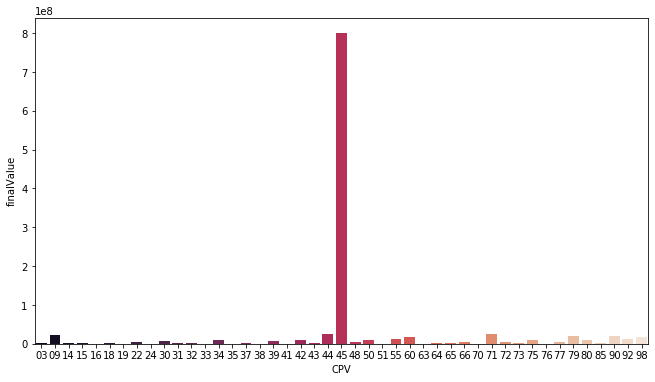

In [66]:
#Plotting it to understand the data better
f, ax = plt.subplots(figsize=(11, 6))
sb.barplot(x=cpv_exp['CPV'], y=cpv_exp['finalValue'], palette='rocket')

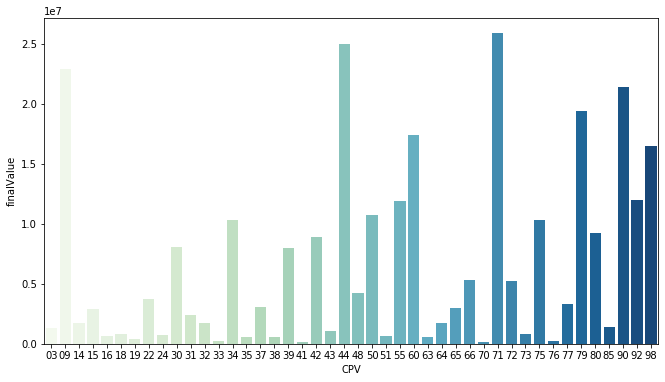

In [67]:
#Plotting it without CPV 45 because it does not allow us to see the dimension of the other expenses
cpv_exp=cpv_exp.loc[cpv_exp['CPV']!='45']

f, ax = plt.subplots(figsize=(11, 6))
sb.barplot(x=cpv_exp['CPV'], y=cpv_exp['finalValue'], palette='GnBu')

5. Can you identify a Municipality that generates a red flag?

In [68]:
#Group expenses by municipalities (using proc_mun and mun)

mun_exp=mun_exp=pd.merge(proc_mun, mun, on='contracting')
mun_exp=mun_exp[['NIF', 'finalValue']]
mun_exp.head()

,NIF,finalValue
0,501306099,NaN
1,501306099,NaN
2,501306099,NaN
3,501306099,NaN
4,501306099,NaN


In [69]:
mun_exp=proc_mun.groupby(mun_exp['NIF'])['finalValue'].sum()
mun_exp=pd.DataFrame(mun_exp)
mun_exp['NIF']=mun_exp.index
mun_exp.reset_index(drop=True, inplace=True)

mun_exp.head()

,finalValue,NIF
0,3887936.12,500051054.0
1,2093307.66,500051062.0
2,39616488.31,500051070.0
3,490922.93,500745773.0
4,7149313.05,500745943.0


In [70]:
#IT IS IMPOSSIBLE FOR A MUNICIPALITY TO HAVE 0 EXPENSES...
mun_exp.loc[mun_exp['finalValue']==0]

,finalValue,NIF
10,0.0,501081216.0
111,0.0,505592959.0
245,0.0,506849635.0
284,0.0,511239980.0


In [71]:
#IT IS IMPOSSIBLE FOR A MUNICIPALITY TO HAVE 0 EXPENSES...
mun.loc[mun['NIF'].isin(list(mun_exp.loc[mun_exp['finalValue']==0]['NIF']))]['Name']

#For me, these municipalities represent a red flag since they are not spending any money

109               Município de Santana
253     Município de Celorico da Beira
273    Município de Fornos de Algodres
316             Município de Barrancos
Name: Name, dtype: object

In [72]:
#NOW LET'S SEE WHO IS SPENDING TO MUCH MONEY (20 municipalities that spend the most)
spenders=list(mun_exp.sort_values(by=['finalValue'], ascending=False).iloc[0:20]['NIF'])
spenders2=list(mun.loc[mun['NIF'].isin(spenders)]['Name'])
spenders2

['Município de Lisboa',
 'Município de Loulé',
 'Município de Leiria',
 'Município de Vila Nova de Famalicão',
 'Município de Odivelas',
 'Município de Portel',
 'Município de Santa Maria da Feira',
 'Município de Braga',
 'Município de Vila Nova de Gaia',
 'Município de Lagos',
 'Município de Serpa',
 'Município de Viana do Castelo',
 'Município de Barcelos',
 'Município de Oeiras',
 'Município de Mafra',
 'Município de Aguiar da Beira',
 'Município de Valongo',
 'Município de Chaves',
 'Município da Mealhada',
 'Município de Tavira']

In [73]:
#Let's see if this is justified by the amount of population
spenders2=[i.split(' ', 2)[2] for i in spenders2]
spenders3=pop.loc[pop['Municipio'].isin(spenders2)]
spenders3

,Municipio,Populacao
8,Viana do Castelo,87570
11,Barcelos,119824
12,Braga,181979
22,Vila Nova de Famalicão,133843
33,Santa Maria da Feira,140052
38,Valongo,95004
40,Vila Nova de Gaia,302989
42,Chaves,40788
116,Mealhada,20299
133,Leiria,126163


In [74]:
#Editing the name in mun_exp
mun_exp=pd.merge(mun_exp, mun, on='NIF')[['finalValue', 'NIF', 'Name']]
mun_exp['Name']=[i.split(' ', 2)[2] for i in mun_exp['Name']]

In [75]:
#Dividing expenses by population
mun_exp=mun_exp.rename(columns={'Name':'Municipio'})
spenders3=pd.merge(spenders3, mun_exp, on='Municipio', how='left')

spenders3['value_capita']=spenders3['finalValue']/spenders3['Populacao']
spenders3

,Municipio,Populacao,finalValue,NIF,value_capita
0,Viana do Castelo,87570,6.491594e+06,506037258.0,74.130347
1,Barcelos,119824,6.792360e+06,505584760.0,56.686137
2,Braga,181979,9.878730e+06,506901173.0,54.285001
3,Vila Nova de Famalicão,133843,6.408479e+06,506663264.0,47.880572
4,Santa Maria da Feira,140052,6.248678e+07,501157280.0,446.168448
5,Valongo,95004,1.522995e+07,501138960.0,160.308503
6,Vila Nova de Gaia,302989,7.660871e+06,505335018.0,25.284319
7,Chaves,40788,9.890550e+06,501205551.0,242.486769
8,Mealhada,20299,7.053196e+06,506792382.0,347.465204
9,Leiria,126163,1.886383e+07,505181266.0,149.519546


In [76]:
spenders3.loc[spenders3['value_capita']>100000]['Municipio']
#these three municipalities generate a HUGE red flag since they are spending more than 100 000€ per habitant!!!

Series([], Name: Municipio, dtype: object)